<a href="https://colab.research.google.com/github/gonzoreyes07/EDP-I/blob/main/Membrana_vibratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Librería que nos permite crear gráficos 3D

In [13]:
def membrana(n, m, L=1.0):
    pi = np.pi
    # Calculamos I_n
    if n % 2 == 1:  # Para n impares
        I_n = (3 / (n * pi)) + (4 / (n * pi)**3)
    else:  # even n
        I_n = -3 / (n * pi)

    # Cálculo de J_m
    if m % 2 == 1:  # m impares
        J_m = (2 / (m * pi)) + (4 / (m * pi)**3)
    else:  # even m
        J_m = -2 / (m * pi)

    # A_nm = 0.4 * I_n * J_m
    return 0.4 * I_n * J_m

In [21]:
print(membrana(1, 1))

0.33195573220817887


In [14]:
def onda(x, y, t, L=1.0, c=1.0, N=10):
    u = 0
    for n in range(1, N+1):
        for m in range(1, N+1):
            A_nm = membrana(n, m, L)
            omega_nm = c * np.pi / L * np.sqrt(n**2 + m**2)
            u += (A_nm * np.sin(n * np.pi * x / L) * np.sin(m * np.pi * y / L) *
                  np.cos(omega_nm * t))
    return u

In [22]:
print(onda(0.5, 0.5, 0.1))

0.19158241164953982


In [15]:
def solucion(Nx=50, Ny=50, t=0.1, L=1.0, c=1.0, N=10):
    x = np.linspace(0, L, Nx)
    y = np.linspace(0, L, Ny)
    X, Y = np.meshgrid(x, y)
    U = np.zeros((Ny, Nx))
    for i in range(Ny):
        for j in range(Nx):
            U[i, j] = onda(X[i, j], Y[i, j], t, L, c, N)
    return X, Y, U

In [23]:
print(solucion())

(array([[0.        , 0.02040816, 0.04081633, ..., 0.95918367, 0.97959184,
        1.        ],
       [0.        , 0.02040816, 0.04081633, ..., 0.95918367, 0.97959184,
        1.        ],
       [0.        , 0.02040816, 0.04081633, ..., 0.95918367, 0.97959184,
        1.        ],
       ...,
       [0.        , 0.02040816, 0.04081633, ..., 0.95918367, 0.97959184,
        1.        ],
       [0.        , 0.02040816, 0.04081633, ..., 0.95918367, 0.97959184,
        1.        ],
       [0.        , 0.02040816, 0.04081633, ..., 0.95918367, 0.97959184,
        1.        ]]), array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02040816, 0.02040816, 0.02040816, ..., 0.02040816, 0.02040816,
        0.02040816],
       [0.04081633, 0.04081633, 0.04081633, ..., 0.04081633, 0.04081633,
        0.04081633],
       ...,
       [0.95918367, 0.95918367, 0.95918367, ..., 0.95918367, 0.95918367,
        0.95918367],
       [0.97959184, 0.97959184, 0

Desplazamiento en (x=0.5, y=0.5, t=0.1): 0.191582


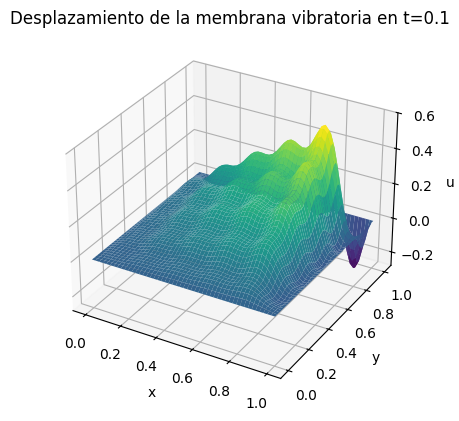

In [24]:
# Ejemplo: evaluamos u en un punto en específico
if __name__ == "__main__":
    x, y, t = 0.5, 0.5, 0.1
    u = onda(x, y, t)
    print(f"Desplazamiento en (x={x}, y={y}, t={t}): {u:.6f}")

    # Visualización del gráfico
    try:
        X, Y, U = solucion()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, U, cmap='viridis')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('u')
        plt.title(f'Desplazamiento de la membrana vibratoria en t={t}')
        plt.show()
    except Exception as e:
        print(f"Error: {e}")